**THIS Notebook does a simple linear regression on data from Libraries.io** 
The getting the data part is very much hacked together but it is placeholder data anyway,
The regression stuff should be quite solid.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.datasets import load_boston
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score




pd.set_option('display.max_columns', 500)

In [2]:
N_SAMPLES = 200000
GET_INTERCEPT = False
PATH ="/home/rick/UH-Spring-2019/Project/codescoop-models/Libraries_io_data/repositories-1.2.0-2018-03-12.csv"

In [3]:
#Functions for factorizing and getting dummies
def gnumeric_func (data, columns):
    data[columns] = data[columns].apply(lambda x: pd.factorize(x)[0])
    return data

def getDummies (data, feature):
    dummies = pd.get_dummies(data[feature])
    data = pd.concat([data, dummies], axis=1)
    data = data.drop([feature],axis=1)
    return data

In [8]:
#getting the explanatory variables, and changing categorial values to dummies
data = pd.read_csv(PATH, usecols=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38], 
                   nrows = N_SAMPLES)


droplist = ['SourceRank','Description', 'Name with Owner', 'Created Timestamp', "Updated Timestamp", 'Last pushed Timestamp', 'Homepage URL', 'Mirror URL', 'UUID', 'Last Synced Timestamp','Fork Source Name with Owner', 'Changelog filename', 'Contributing guidelines filename', 'License filename','Code of Conduct filename', 'Security Threat Model filename', 'Security Audit filename', 'SCM type', 'Logo URL', 'Keywords', 'Stars Count' ]
factorizelist = ['Host Type', 'Fork', 'Issues enabled', 'Wiki enabled', 'Pages enabled', 'Default branch', 'Status', 'Display Name', 'Pull requests enabled'] 
dummieslist = ['Language', 'License']

datax = data.drop(droplist, axis=1)
datax = datax.drop(['Readme filename'], axis=1) #idk why I need to do it separately, cleaning is for later

datax = gnumeric_func(datax, factorizelist)

for item in dummieslist:
    datax = getDummies(datax,item)


datax.head()

/home/rick/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (16,31,38) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Host Type,Fork,Size,Issues enabled,Wiki enabled,Pages enabled,Forks Count,Open Issues Count,Default branch,Watchers Count,Contributors Count,Status,Display Name,Pull requests enabled,AGS Script,ANTLR,API Blueprint,ASP,ActionScript,ApacheConf,Apex,AppleScript,Arduino,Assembly,AutoIt,Batchfile,C,C#,C++,CMake,CSS,Ceylon,Cirru,Clean,Clojure,CoffeeScript,ColdFusion,Common Lisp,Coq,Cucumber,D,Dart,Dogescript,Eagle,Eiffel,Elixir,Emacs Lisp,Erlang,F#,FLUX,Fancy,Fortran,FreeMarker,GAP,GLSL,Game Maker Language,Genshi,Gherkin,Go,Gosu,Groff,Groovy,HCL,HTML,Hack,Handlebars,Haskell,Haxe,Hy,Isabelle,Java,JavaScript,Julia,Jupyter Notebook,KiCad,Kotlin,LLVM,Liquid,LiveScript,Lua,Makefile,Mathematica,Matlab,Max,Mirah,Nim,Nimrod,Nix,OCaml,Objective-C,Objective-C++,Objective-J,OpenEdge ABL,PHP,PLSQL,PLpgSQL,POV-Ray SDL,Pan,Pascal,Perl,Perl 6,PogoScript,PowerShell,Processing,Prolog,Protocol Buffer,Puppet,PureScript,Python,QML,R,RAML,Racket,Ragel,Roff,Ruby,Rust,SMT,SQLPL,Scala,Scheme,Shell,Smali,Smarty,SourcePawn,SuperCollider,Swift,Tcl,TeX,Thrift,TypeScript,Verilog,Vim script,VimL,Visual Basic,Web Ontology Language,XML,XProc,XSLT,Xtend,Yacc,Zephir,eC,nesC,wisp,AFL-3.0,AGPL-3.0,Apache-2.0,Artistic-2.0,BSD-2-Clause,BSD-3-Clause,BSD-3-Clause-Clear,BSL-1.0,CC-BY-4.0,CC-BY-NC-ND-3.0,CC-BY-SA-3.0,CC-BY-SA-4.0,CC0-1.0,ECL-2.0,EPL-1.0,EUPL-1.1,GPL-2.0,GPL-3.0,GPL-3.0+,ISC,LGPL-2.0,LGPL-2.1,LGPL-2.1+,LGPL-3.0,LGPL-3.0+,MIT,MPL-2.0,MS-PL,MS-RL,OFL-1.1,OSL-3.0,Other,Unlicense,W3C,WTFPL,Zlib,mit
1,0,0,512,0,0,0,0,1,0,2,1,-1,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,924,0,0,1,782,85,0,61,21,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1,472,1,0,1,0,0,0,1,5,-1,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,536,0,0,0,1,2,0,1,1,-1,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,192,0,0,1,0,0,0,2,1,-1,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


alpha =  0.0001
Training score: 0.7785907512052199
Test score:  0.7976301324347514
Number of features used:  159
 
alpha =  0.001
Training score: 0.7785877733694568
Test score:  0.7976128690852586
Number of features used:  95
 
alpha =  0.01
Training score: 0.7785366569925434
Test score:  0.7976897772988465
Number of features used:  61
 
alpha =  0.05
Training score: 0.778294733421756
Test score:  0.797802141161493
Number of features used:  41
 
alpha =  0.1
Training score: 0.7781901007345368
Test score:  0.797776675460734
Number of features used:  32
 
alpha =  1
Training score: 0.7778988314546096
Test score:  0.7977447221799335
Number of features used:  17
 
alpha =  5
Training score: 0.776392858387836
Test score:  0.7964918443704307
Number of features used:  11
 
alpha =  10
Training score: 0.7758220407686226
Test score:  0.7959428958157396
Number of features used:  6
 
Optimal alpha =  0.05


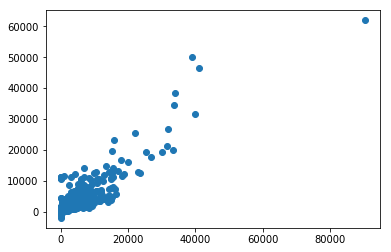

Mean squared error:  164269.40728740272
Model R² score:  0.797802141161493


In [5]:
# This code demonstrates how to use lasso regression for choosing optimal variables
# for a linear model.

# x should be a dataframe containing the explanatory variables (forks, language, etc)
x = datax

# y should be a vector containing the target variable (number of stars)
y = list(data["Stars Count"])

# split the data in to train and test part
X_train, X_test, y_train, y_test = train_test_split(x, y)


## trying different alphas and choosing the optimal model

# if fitting of the model is really slow, you can drop last values of alpha to make it faster
alphas = [0.0001, 0.001, 0.01, 0.05, 0.1, 1, 5, 10]
n = len(alphas)
test_scores = np.zeros(n)

for i in range(0,n):
    a = alphas[i]
    print("alpha = ", a)
    lasso = Lasso(alpha = a, max_iter = 10e5)
    lasso.fit(X_train, y_train)
    train_score=lasso.score(X_train,y_train)
    test_score=lasso.score(X_test,y_test)
    test_scores[i] = test_score
    coeff_used = np.sum(lasso.coef_!=0)
    print("Training score:", train_score)
    print("Test score: ", test_score)
    print("Number of features used: ", coeff_used)
    print(" ")

# pick the alpha value with best score
best_alpha = alphas[np.argmax(test_scores)]
print("Optimal alpha = ", best_alpha)
lasso = Lasso(alpha = best_alpha, max_iter = 10e5)
lasso.fit(X_train, y_train)

# create a dataframe with the coefficents of the features
df_coef = pd.DataFrame({'Features':x.columns,'coeff': lasso.coef_})
df_coef = df_coef.sort_values(by = ['coeff'])


if GET_INTERCEPT:
    df_intercept = pd.DataFrame({'Features':['Intercept'], 'coeff':lasso.intercept_} )
    df_coef = df_coef.append(df_intercept)
    df_coef = df_coef[df_coef.coeff != -0.0]


# model summary
predicted = lasso.predict(X_test)
expected = y_test
# expected vs predicted values
plt.scatter(expected, predicted)
plt.show()
print("Mean squared error: ", mean_squared_error(expected, predicted))
print("Model R² score: ", r2_score(expected, predicted))

In [6]:
#df_coef

In [7]:
# using statsmodels and the selected features from the lasso regression
featureList = list(df_coef.Features)

if GET_INTERCEPT:
    del featureList[-1]

dataxStats = datax[featureList]
statsmodel = sm.OLS(data['Stars Count'], dataxStats).fit()

print(statsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:            Stars Count   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     4047.
Date:                Mon, 11 Mar 2019   Prob (F-statistic):               0.00
Time:                        17:25:51   Log-Likelihood:            -1.5078e+06
No. Observations:              200000   AIC:                         3.016e+06
Df Residuals:                  199819   BIC:                         3.018e+06
Df Model:                         181                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Java                   -114.30